# Library

In [2]:
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 103.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.7 MB/s eta 0:00:00


In [4]:
!pip install deep-translator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from deep_translator import GoogleTranslator
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [86]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Mendownload stopwords jika belum ada
nltk.download('stopwords')

# Mendownload model/tokenizer jika belum ada
nltk.download('punkt')

# Daftar stopwords dalam bahasa Indonesia
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [96]:
import tweepy as tw
import pandas as pd
import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="darkgrid")
from wordcloud import WordCloud
import re  

## API Twitter

In [8]:
api_key = "your_api_key"
api_secret_key = "your_api_secret_key"
access_token = "your_access_token"
access_token_secret = "your_access_token_secret"

In [9]:
# Authenticate to Twitter
auth = tw.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth)

# Scraping Data

In [10]:
# Collect tweets dari user 
#tweets = api.user_timeline(id='aniesbaswedan', count=20)

In [11]:
#for tweet in tweets:
#    print(tweet.text)


In [13]:
import datetime
from datetime import timedelta
search_words = "presiden 2024"
tanggal_hari_ini = datetime.datetime.now().strftime('%Y-%m-%d')
tanggal_30_hari_lalu = (datetime.datetime.now() - datetime.timedelta(days=90)).strftime('%Y-%m-%d')

tweets = []
max_id = None

while len(tweets) < 10000:
    try:
        hasil_search = api.search_tweets(q=search_words, lang="id", count=100, tweet_mode="extended", result_type="recent", max_id=max_id)
        for tweet in hasil_search:
            tweets.append(tweet)
        print("Jumlah tweet yang diambil: " + str(len(tweets)))
        max_id = tweet.id - 1
    except tw.TweepError as e:
        print("Error: " + str(e))
        print("Menunggu selama 15 menit...")
        time.sleep(60 * 15)

    # Tunggu 5 detik sebelum melanjutkan scraping
    time.sleep(5)

print("Scraping selesai! Total tweets: " + str(len(tweets)))

Jumlah tweet yang diambil: 100
Jumlah tweet yang diambil: 200
Jumlah tweet yang diambil: 300
Jumlah tweet yang diambil: 400
Jumlah tweet yang diambil: 500
Jumlah tweet yang diambil: 600
Jumlah tweet yang diambil: 700
Jumlah tweet yang diambil: 800
Jumlah tweet yang diambil: 900
Jumlah tweet yang diambil: 1000
Jumlah tweet yang diambil: 1100
Jumlah tweet yang diambil: 1200
Jumlah tweet yang diambil: 1294
Jumlah tweet yang diambil: 1393
Jumlah tweet yang diambil: 1493
Jumlah tweet yang diambil: 1593
Jumlah tweet yang diambil: 1692
Jumlah tweet yang diambil: 1792
Jumlah tweet yang diambil: 1892
Jumlah tweet yang diambil: 1992
Jumlah tweet yang diambil: 2080
Jumlah tweet yang diambil: 2180
Jumlah tweet yang diambil: 2280
Jumlah tweet yang diambil: 2376
Jumlah tweet yang diambil: 2476
Jumlah tweet yang diambil: 2576
Jumlah tweet yang diambil: 2676
Jumlah tweet yang diambil: 2775
Jumlah tweet yang diambil: 2875
Jumlah tweet yang diambil: 2975
Jumlah tweet yang diambil: 3075
Jumlah tweet yang

Kode di atas akan terus melakukan scraping hingga jumlah tweet yang diambil mencapai 10000. Jumlah tweet yang diambil pada setiap pengambilan adalah 100, dan diulang dengan jeda 5 detik setiap kali satu pengambilan selesai. Pada saat terjadi error, kode akan menunggu selama 15 menit sebelum melanjutkan scraping kembali. 

## Hasil search

In [14]:
# Buat dataframe dari tweets
df = pd.DataFrame({
    'Tanggal': [tweet.created_at for tweet in tweets],
    'Username': [tweet.user.screen_name for tweet in tweets],
    'Tweet': [tweet.full_text for tweet in tweets],
    'Lokasi': [tweet.user.location for tweet in tweets],
    'Followers': [tweet.user.followers_count for tweet in tweets]
})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10087 entries, 0 to 10086
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Tanggal    10087 non-null  datetime64[ns, UTC]
 1   Username   10087 non-null  object             
 2   Tweet      10087 non-null  object             
 3   Lokasi     10087 non-null  object             
 4   Followers  10087 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(3)
memory usage: 394.1+ KB


In [23]:
df.describe(include='O').T

,count,unique,top,freq
Username,10087,4688,ganjaruniverse,112
Tweet,10087,2643,RT @idtodayco: Alumni ITB Deklarasikan Anies B...,495
Lokasi,10087,1064,,5460


In [16]:
# export ke csv
df.to_csv('hasil_search.csv', index=False)

# Preprocesing Data

## EDA

In [24]:
df.head()

,Tanggal,Username,Tweet,Lokasi,Followers
0,2023-06-11 13:27:47+00:00,saifullahabid,RT @billy4riez: Warga Nahdliyin Kota Proboling...,Lamongan,1755
1,2023-06-11 13:27:41+00:00,antonim212,RT @Obay_Kusut1981: Waduh Makin Meriang dan Ma...,,194
2,2023-06-11 13:27:34+00:00,kimvocic,"RT @BosPurwa: Bener kan dugaan selama ini, bah...",,25
3,2023-06-11 13:27:14+00:00,beraniadilhebat,RT @baharirwan2: Pada akhirnya semua mendukung...,Indonesia,1156
4,2023-06-11 13:26:34+00:00,BambangRiy57271,RT @Fauzi56100765: Barokalloh.. Anies Rasyid B...,,164


In [25]:
df.tail()

,Tanggal,Username,Tweet,Lokasi,Followers
10082,2023-06-08 23:13:50+00:00,JohnySudiar,RT @A_FauziFawaz: Jelas yaa bosqu Gus Muhaimin...,,5
10083,2023-06-08 23:12:30+00:00,GrandLight88,@BANGSAygSUJUD @kulit_kcang @prabowo @TitiekSo...,,1402
10084,2023-06-08 23:12:20+00:00,Khamim58660928,RT @LANGKAHANIES: Mau negaranya lebih baik\nNa...,,277
10085,2023-06-08 23:12:14+00:00,sangdatuk08,RT @LANGKAHANIES: Warga tegal Ramai ramai yang...,,453
10086,2023-06-08 23:11:58+00:00,M_Zulfan_Z,@n_alfarez @uqiiiiiii @Outstandjing @dfat Pili...,SMS Only: 081388998480,162


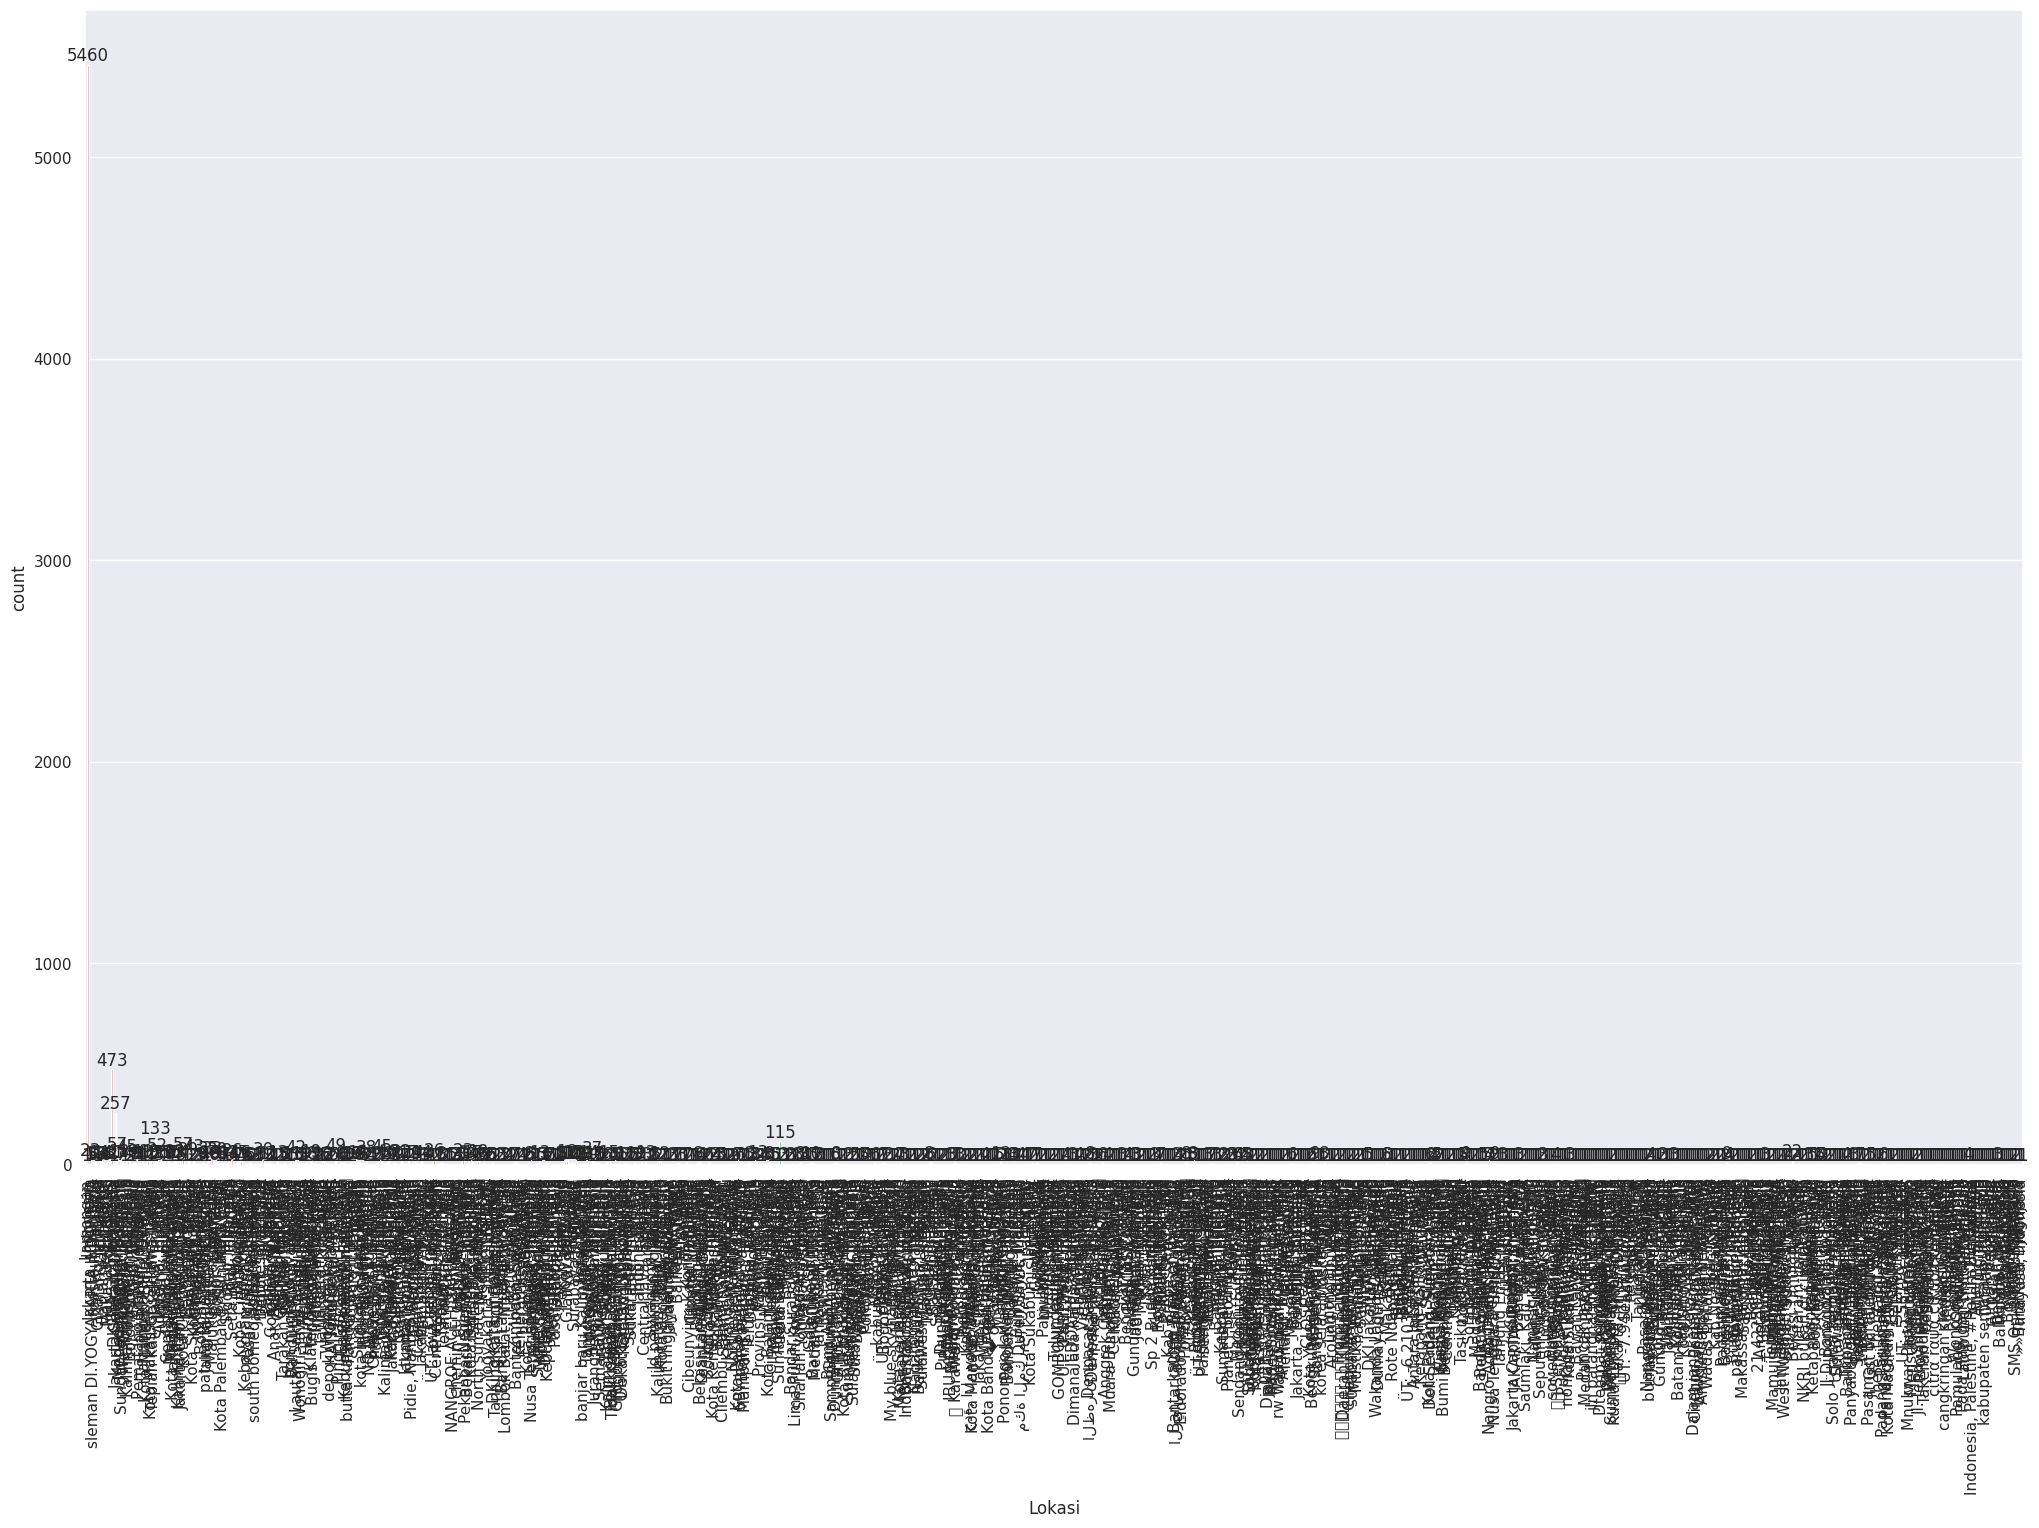

In [28]:
plt.figure(figsize=(25,15))
a = sns.countplot(x='Lokasi' , data=df)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.xticks(rotation=90)
plt.show()


In [26]:
print('Tanggal Awal Dalam Data', df['Tanggal'].min())
print('Tanggal Terakhir Dalam Data', df['Tanggal'].max())

Tanggal Awal Dalam Data 2023-06-08 23:11:58+00:00
Tanggal Terakhir Dalam Data 2023-06-11 13:27:47+00:00


In [27]:
df['Lokasi'].value_counts()

                             5460
Indonesia                     473
DKI Jakarta, Indonesia        257
Jakarta                       133
Sumatera Barat, Indonesia     115
                             ... 
Medan, Indonesia                1
Bali                            1
Meikarta                        1
Kota Tangerang                  1
Tirtayasa, Indonesia            1
Name: Lokasi, Length: 1064, dtype: int64

## Cleaning Tweet

In [75]:
# Cleaning data
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # hapus @username
    text = re.sub(r'#', '', text) # hapus #
    text = re.sub(r'RT[\s]+', '', text) # hapus RT
    text = re.sub(r'https?:\/\/\S+', '', text) # hapus link
    text = re.sub(r'&amp;', '', text) # hapus &
    text = re.sub(r'\n', '', text) # hapus \n
    text = re.sub(r'[^\w\s]', '', text) # hapus tanda baca
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower() # ubah ke huruf kecil
    return text

df['Tweet'] = df['Tweet'].apply(clean_text)
df['Tweet_Eng'] = df['Tweet_Eng'].apply(clean_text)
df.head()

,Tanggal,Username,Tweet,Lokasi,Followers,Tweet_Eng,Sentimen,Score
0,2023-06-11 13:27:47+00:00,saifullahabid,warga nahdliyin kota probolinggo sepakat dukun...,Lamongan,1755,nahdliyin residents of probolinggo city agree ...,POSITIVE,0.999708
1,2023-06-11 13:27:41+00:00,antonim212,kusut meriang masif ne kubu sebelah nyera...,,194,kusut massive fever the sidebyside side i...,NEGATIVE,0.999318
2,2023-06-11 13:27:34+00:00,kimvocic,bener dugaan orang statusnya capres pilpres ...,,25,it is true that people are candidates for th...,POSITIVE,0.999126
3,2023-06-11 13:27:14+00:00,beraniadilhebat,mendukung anies baswedan presidenri alumni ...,Indonesia,1156,support anies baswedan presidenti alumni it...,POSITIVE,0.869244
4,2023-06-11 13:26:34+00:00,BambangRiy57271,barokalloh anies rasyid baswedan presiden,,164,barokalloh anies rasyid baswedan president,POSITIVE,0.979288


In [76]:
f=open('stopwords.txt')
ina_stopword = f.read()
ina_stopword = ina_stopword.split('\n')
def remove_stopwords(text):
    text = ' '.join(word for word in text.split() if word not in ina_stopword)
    return text

df['Tweet'] = df['Tweet'].apply(remove_stopwords)
df.head()

,Tanggal,Username,Tweet,Lokasi,Followers,Tweet_Eng,Sentimen,Score
0,2023-06-11 13:27:47+00:00,saifullahabid,warga nahdliyin kota probolinggo sepakat dukun...,Lamongan,1755,nahdliyin residents of probolinggo city agree ...,POSITIVE,0.999708
1,2023-06-11 13:27:41+00:00,antonim212,kusut meriang masif ne kubu sebelah nyerangkub...,,194,kusut massive fever the sidebyside side i...,NEGATIVE,0.999318
2,2023-06-11 13:27:34+00:00,kimvocic,bener dugaan orang statusnya capres pilpres,,25,it is true that people are candidates for th...,POSITIVE,0.999126
3,2023-06-11 13:27:14+00:00,beraniadilhebat,mendukung anies baswedan presidenri alumni itb...,Indonesia,1156,support anies baswedan presidenti alumni it...,POSITIVE,0.869244
4,2023-06-11 13:26:34+00:00,BambangRiy57271,barokalloh anies rasyid baswedan presiden,,164,barokalloh anies rasyid baswedan president,POSITIVE,0.979288


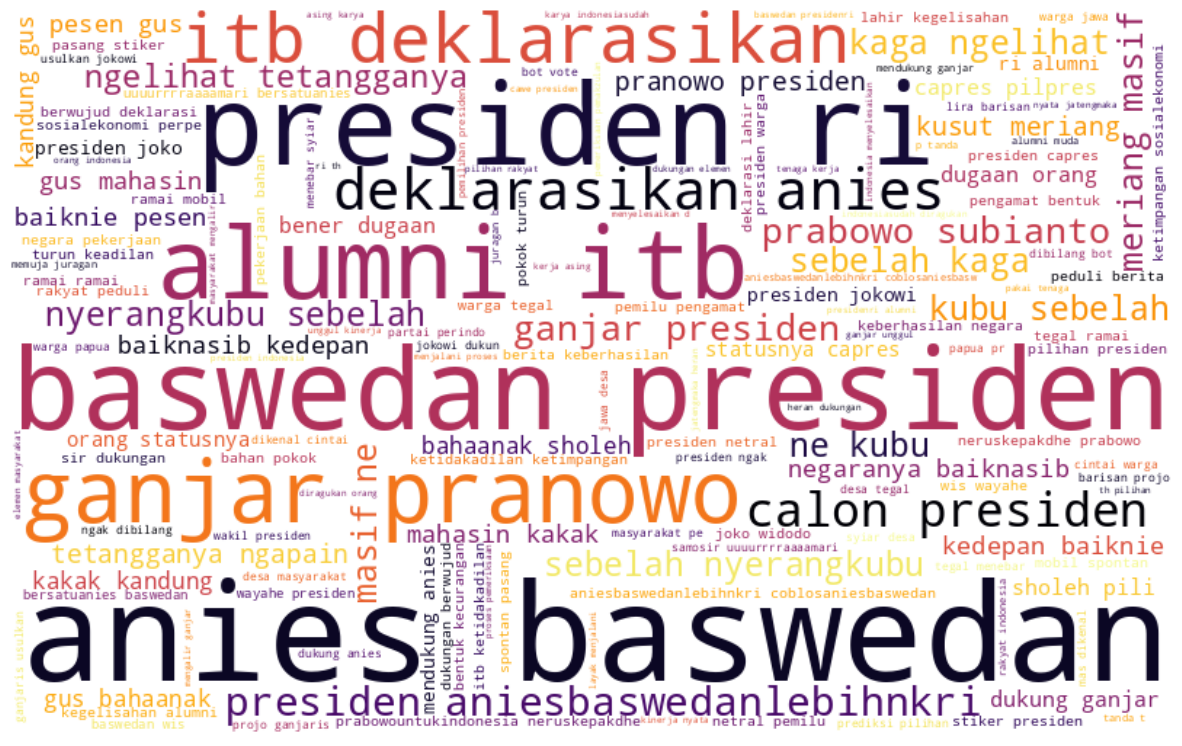

In [77]:
all_words = ' '.join([text for text in df['Tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=True,
                        background_color='white', colormap='inferno',
                        max_font_size=110).generate(all_words)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

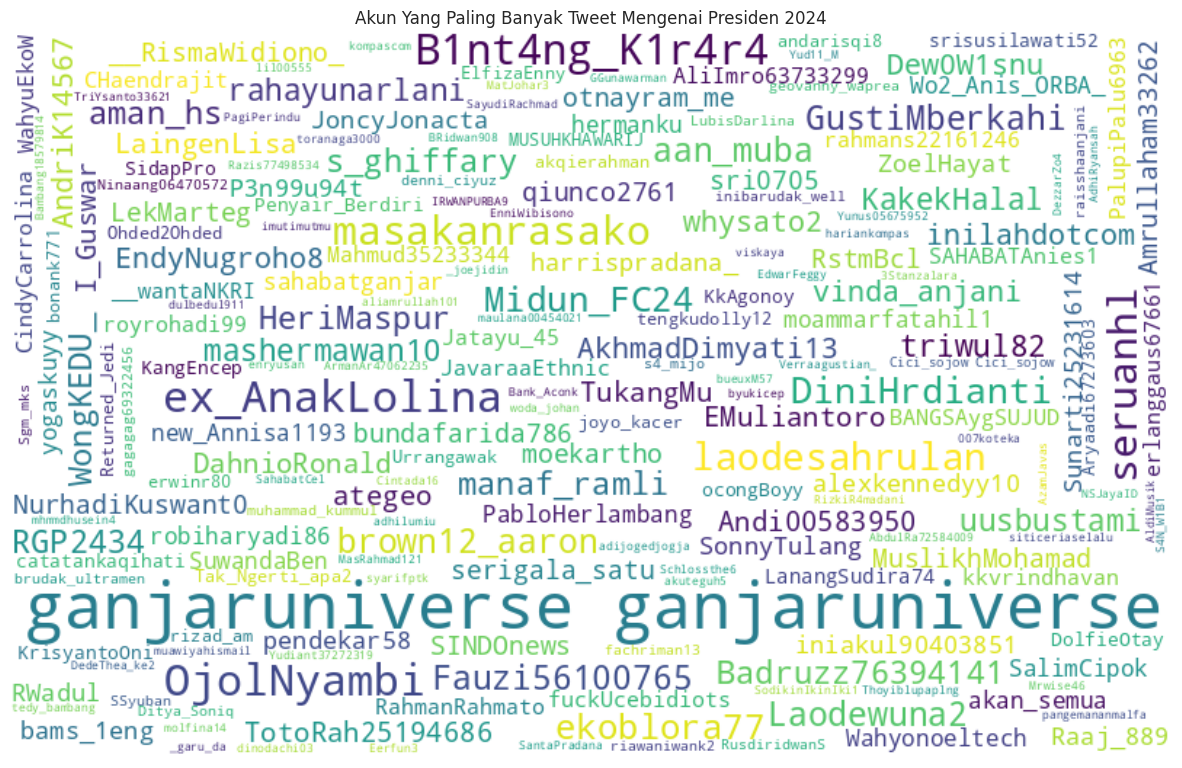

In [78]:
# Wordcloud
all_words = ' '.join([text for text in df['Username']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,
                        background_color='white', colormap='viridis',
                        ).generate(all_words)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Akun Yang Paling Banyak Tweet Mengenai Presiden 2024')
plt.show()

In [79]:
df.duplicated().sum()

0

In [34]:
# drop duplicate
df.drop_duplicates(inplace=True)

In [35]:
df.duplicated().sum()

0

## Labeling 

### Translate Ke Inggris

In [36]:
tweet_eng = df['Tweet']
tweet_eng

0        warga nahdliyin kota probolinggo sepakat dukun...
1        _kusut1981 meriang masif ne kubu sebelah nyera...
2        bener dugaan 2 orang statusnya capres pilpres ...
3        mendukung anies baswedan presidenri2024alumni ...
4           barokalloh anies rasyid baswedan presiden 2024
                               ...                        
10082    _fauzifawaz bosqu gus muhaimin pkb reformasi f...
10083    _kcang _fahnoor _inismyname _ _2024 rujuk jauh...
10084    negaranya baiknasib kedepan baiknie pesen gus ...
10085    warga tegal ramai ramai mobil spontan pasang s...
10086    _alfarez ridwan kamil presiden ri 2024 indones...
Name: Tweet, Length: 10084, dtype: object

In [38]:
data_eng = []
for i in tweet_eng:
  data_eng.append(GoogleTranslator(source='id', target='en').translate(i))

In [39]:
df['Tweet_Eng'] = data_eng
df.head()

,Tanggal,Username,Tweet,Lokasi,Followers,Tweet_Eng
0,2023-06-11 13:27:47+00:00,saifullahabid,warga nahdliyin kota probolinggo sepakat dukun...,Lamongan,1755,Nahdliyin residents of Probolinggo City agree ...
1,2023-06-11 13:27:41+00:00,antonim212,_kusut1981 meriang masif ne kubu sebelah nyera...,,194,"_kusut1981 massive fever, the side-by-side sid..."
2,2023-06-11 13:27:34+00:00,kimvocic,bener dugaan 2 orang statusnya capres pilpres ...,,25,It is true that 2 people are candidates for th...
3,2023-06-11 13:27:14+00:00,beraniadilhebat,mendukung anies baswedan presidenri2024alumni ...,Indonesia,1156,support anies baswedan presidenti2024alumni it...
4,2023-06-11 13:26:34+00:00,BambangRiy57271,barokalloh anies rasyid baswedan presiden 2024,,164,barokalloh anies rasyid baswedan president 2024


### Text Classification

In [40]:
from transformers import pipeline, DistilBertTokenizer
sentimen = 'distilbert-base-uncased-finetuned-sst-2-english'
token = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

nlp = pipeline(
    'text-classification',
    model= sentimen,
    tokenizer=token
)

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [41]:
sentimen_eng= df['Tweet_Eng']
data_sentimen =[]

for i in sentimen_eng:
  data_sentimen.append(nlp(i))

In [42]:
# Kolom Sentimen
predicted_label = []
score = []

for j in data_sentimen:
  for i in j:
    predicted_label.append(i['label'])
    score.append(i['score'])


In [43]:
df['Sentimen'] = predicted_label
df['Score'] = score
df.head()

,Tanggal,Username,Tweet,Lokasi,Followers,Tweet_Eng,Sentimen,Score
0,2023-06-11 13:27:47+00:00,saifullahabid,warga nahdliyin kota probolinggo sepakat dukun...,Lamongan,1755,Nahdliyin residents of Probolinggo City agree ...,POSITIVE,0.999708
1,2023-06-11 13:27:41+00:00,antonim212,_kusut1981 meriang masif ne kubu sebelah nyera...,,194,"_kusut1981 massive fever, the side-by-side sid...",NEGATIVE,0.999318
2,2023-06-11 13:27:34+00:00,kimvocic,bener dugaan 2 orang statusnya capres pilpres ...,,25,It is true that 2 people are candidates for th...,POSITIVE,0.999126
3,2023-06-11 13:27:14+00:00,beraniadilhebat,mendukung anies baswedan presidenri2024alumni ...,Indonesia,1156,support anies baswedan presidenti2024alumni it...,POSITIVE,0.869244
4,2023-06-11 13:26:34+00:00,BambangRiy57271,barokalloh anies rasyid baswedan presiden 2024,,164,barokalloh anies rasyid baswedan president 2024,POSITIVE,0.979288


In [44]:
df['Sentimen'].value_counts()

POSITIVE    6648
NEGATIVE    3436
Name: Sentimen, dtype: int64

In [115]:
df['Sentimen'] = df['Sentimen'].map({'NEGATIVE':0, 'POSITIVE':1})

In [116]:
df['Sentimen'].value_counts()

1    6648
0    3436
Name: Sentimen, dtype: int64

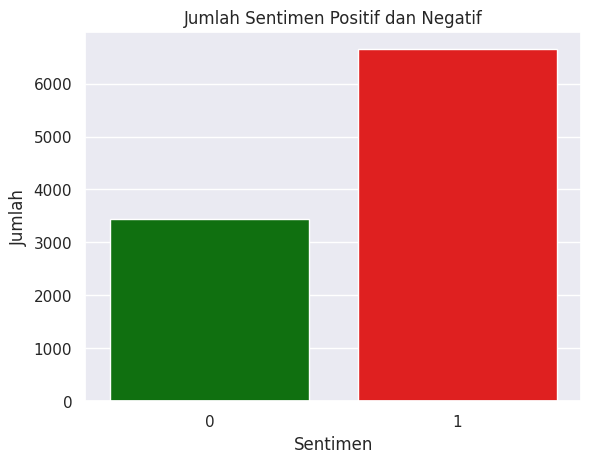

In [117]:
sns.countplot(data=df, x='Sentimen', palette = ('Green','Red'))
plt.ylabel('Jumlah')
plt.title('Jumlah Sentimen Positif dan Negatif')
plt.show()

In [118]:
X = df['Tweet_Eng']
y = df['Sentimen']

In [119]:
X

0        nahdliyin residents of probolinggo city agree ...
1         kusut     massive fever the sidebyside side i...
2        it is true that   people are candidates for th...
3        support anies baswedan presidenti    alumni it...
4          barokalloh anies rasyid baswedan president     
                               ...                        
10082     fauzifawaz bosqu gus muhaimin pkb village foc...
10083     kcang  fahnoor  inismyname         refer to t...
10084    the country is good the future is good message...
10085    residents of tegal bustling with cars spontane...
10086     alfarez ridwan kamil president of the republi...
Name: Tweet_Eng, Length: 10084, dtype: object

In [120]:
def preprocess_text(text):
    # Mengubah teks menjadi lowercase
    text = str(text).lower()
    # Tokenisasi teks menjadi kata-kata
    tokens = word_tokenize(text)
    # Menghapus stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Melakukan stemming pada setiap kata
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    # Menggabungkan kata-kata yang telah diproses kembali menjadi teks
    processed_text = ' '.join(stemmed_tokens)
    return processed_text

In [121]:
komentar_preprocessed = [preprocess_text(text) for text in X]

In [122]:
komentar_preprocessed[:5]

['nahdliyin resid probolinggo citi agre support gu muhaimin presidenti candid worthi',
 'kusut massiv fever sidebysid side attack sidebysid see neighbor',
 'true peopl candid presidenti elect',
 'support ani baswedan presidenti alumni itb declar ani baswedan presid ri',
 'barokalloh ani rasyid baswedan presid']

In [123]:
tfidf = TfidfVectorizer(max_features=10000, stop_words=stopwords.words('english'), ngram_range=(1,3), min_df=2, max_df=0.5)
X_tf_idf = tfidf.fit_transform(komentar_preprocessed).toarray()

# Cek jumlah kata
tfidf.get_feature_names_out()[:5]


array(['aalamiin', 'aalona', 'aamiiin', 'aamiiin allahumma',
       'aamiiin allahumma aamiiin'], dtype=object)

In [124]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()
X_tf_idf, y = smote.fit_resample(X_tf_idf, y)
print(sorted(Counter(y).items()))

[(0, 6648), (1, 6648)]


In [125]:
scaler = MinMaxScaler()
X_tf_idf = scaler.fit_transform(X_tf_idf)
print(X_tf_idf)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [126]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X_tf_idf, y, test_size=0.33, random_state=42)

# Modeling

In [151]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error, roc_auc_score, auc, roc_curve

In [144]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

def naive_bayes(X_train, y_train, X_test, y_test):
    # Inisialisasi model Naive Bayes
    model = MultinomialNB()
    # Melatih model dengan data training
    model.fit(X_train, y_train)
    # Memprediksi label untuk data test
    y_pred = model.predict(X_test)
    return y_pred

def svm(X_train, y_train, X_test, y_test):
    # Inisialisasi model SVM
    model = SVC()
    # Melatih model dengan data training
    model.fit(X_train, y_train)
    # Memprediksi label untuk data test
    y_pred = model.predict(X_test)
    return y_pred

def logistic_regression(X_train, y_train, X_test, y_test):
    # Inisialisasi model Logistic Regression
    model = LogisticRegression()
    # Melatih model dengan data training
    model.fit(X_train, y_train)
    # Memprediksi label untuk data test
    y_pred = model.predict(X_test)
    return y_pred

def adaboost(X_train, y_train, X_test, y_test):
    # Inisialisasi model Adaboost
    model = AdaBoostClassifier()
    # Melatih model dengan data training
    model.fit(X_train, y_train)
    # Memprediksi label untuk data test
    y_pred = model.predict(X_test)
    return y_pred

def gradient_boosting(X_train, y_train, X_test, y_test):
    # Inisialisasi model Gradient Boosting
    model = GradientBoostingClassifier()
    # Melatih model dengan data training
    model.fit(X_train, y_train)
    # Memprediksi label untuk data test
    y_pred = model.predict(X_test)
    return y_pred


def Random_Forest(X_train, y_train, X_test, y_test):
    # Inisialisasi model Gradient Boosting
    model = RandomForestClassifier()
    # Melatih model dengan data training
    model.fit(X_train, y_train)
    # Memprediksi label untuk data test
    y_pred = model.predict(X_test)
    return y_pred


In [145]:
# Memanggil fungsi pemodelan Naive Bayes
y_pred_nb = naive_bayes(X_train, y_train, X_test, y_test)

# Memanggil fungsi pemodelan SVM
y_pred_svm = svm(X_train, y_train, X_test, y_test)

# Memanggil fungsi pemodelan Logistic Regression
y_pred_lr = logistic_regression(X_train, y_train, X_test, y_test)

# Memanggil fungsi pemodelan Adaboost
y_pred_adaboost = adaboost(X_train, y_train, X_test, y_test)

# Memanggil fungsi pemodelan Gradient Boosting
y_pred_gb = gradient_boosting(X_train, y_train, X_test, y_test)

# Memanggil fungsi pemodelan Random Forest
y_pred_rf = Random_Forest(X_train, y_train, X_test, y_test)

# Evaluation

In [146]:
# Evaluasi Naive Bayes
print("Naive Bayes:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print("Mean Absolute Error (MAE):")
print(mean_absolute_error(y_test, y_pred_nb))
print("ROC AUC Score:")
print(roc_auc_score(y_test, y_pred_nb))
print()

# Evaluasi SVM
print("SVM:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("Mean Absolute Error (MAE):")
print(mean_absolute_error(y_test, y_pred_svm))
print("ROC AUC Score:")
print(roc_auc_score(y_test, y_pred_svm))
print()

# Evaluasi Logistic Regression
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("Mean Absolute Error (MAE):")
print(mean_absolute_error(y_test, y_pred_lr))
print("ROC AUC Score:")
print(roc_auc_score(y_test, y_pred_lr))
print()

# Evaluasi Adaboost
print("Adaboost:")
print(classification_report(y_test, y_pred_adaboost))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adaboost))
print("Mean Absolute Error (MAE):")
print(mean_absolute_error(y_test, y_pred_adaboost))
print("ROC AUC Score:")
print(roc_auc_score(y_test, y_pred_adaboost))
print()

# Evaluasi Gradient Boosting
print("Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))
print("Mean Absolute Error (MAE):")
print(mean_absolute_error(y_test, y_pred_gb))
print("ROC AUC Score:")
print(roc_auc_score(y_test, y_pred_gb))
print()

# Evaluasi Random Forest
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Mean Absolute Error (MAE):")
print(mean_absolute_error(y_test, y_pred_rf))
print("ROC AUC Score:")
print(roc_auc_score(y_test, y_pred_rf))
print()


Naive Bayes:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2181
           1       0.94      0.98      0.96      2207

    accuracy                           0.96      4388
   macro avg       0.96      0.96      0.96      4388
weighted avg       0.96      0.96      0.96      4388

Confusion Matrix:
[[2050  131]
 [  48 2159]]
Mean Absolute Error (MAE):
0.040793072014585235
ROC AUC Score:
0.9590934143726342

SVM:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2181
           1       0.98      0.96      0.97      2207

    accuracy                           0.97      4388
   macro avg       0.97      0.97      0.97      4388
weighted avg       0.97      0.97      0.97      4388

Confusion Matrix:
[[2127   54]
 [  82 2125]]
Mean Absolute Error (MAE):
0.03099361896080219
ROC AUC Score:
0.9690431034429029

Logistic Regression:
              precision    recall  f1-score   suppor

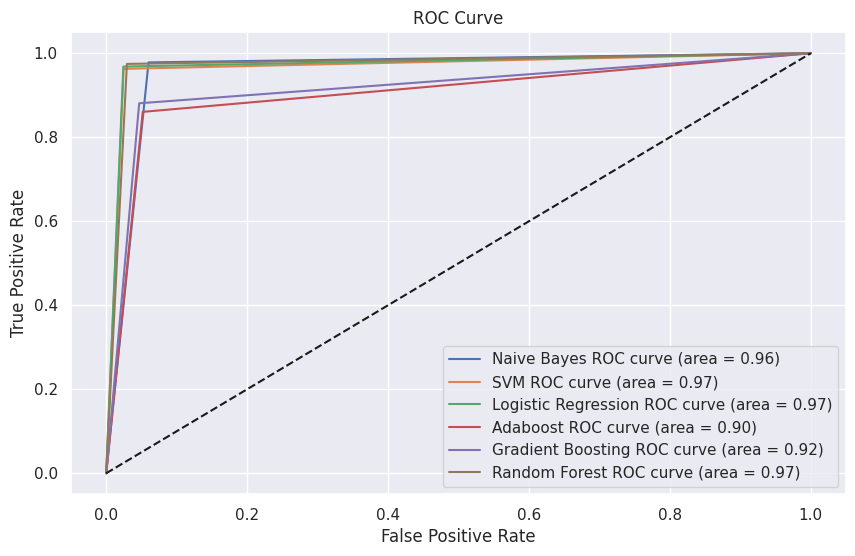

In [153]:
# ROC Curve
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_nb)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr)
fpr_adaboost, tpr_adaboost, thresholds_adaboost = roc_curve(y_test, y_pred_adaboost)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_gb)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)

roc_auc_nb = auc(fpr_nb, tpr_nb)
roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_adaboost = auc(fpr_adaboost, tpr_adaboost)
roc_auc_gb = auc(fpr_gb, tpr_gb)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot(fpr_svm, tpr_svm, label='SVM ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_adaboost, tpr_adaboost, label='Adaboost ROC curve (area = %0.2f)' % roc_auc_adaboost)
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting ROC curve (area = %0.2f)' % roc_auc_gb)
plt.plot(fpr_rf, tpr_rf, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

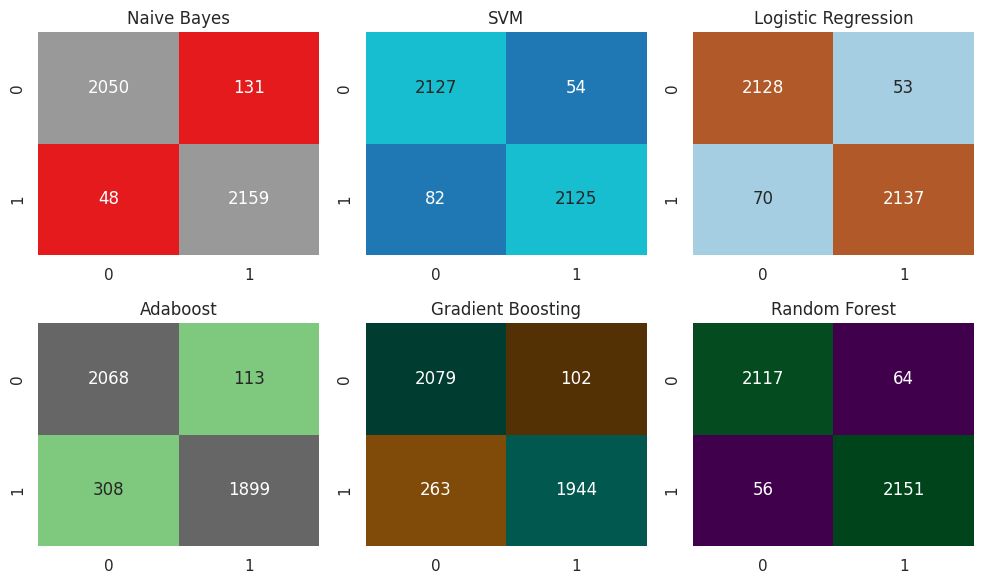

In [154]:
# Confusion Matrix
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
confusion_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
confusion_matrix_gb = confusion_matrix(y_test, y_pred_gb)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10, 6))
plt.subplot(231)
plt.title('Naive Bayes')
sns.heatmap(confusion_matrix_nb, annot=True, cmap='Set1', fmt='d', cbar=False)
plt.subplot(232)
plt.title('SVM')
sns.heatmap(confusion_matrix_svm, annot=True, cmap='tab10', fmt='d', cbar=False)
plt.subplot(233)
plt.title('Logistic Regression')
sns.heatmap(confusion_matrix_lr, annot=True, cmap='Paired', fmt='d', cbar=False)
plt.subplot(234)
plt.title('Adaboost')
sns.heatmap(confusion_matrix_adaboost, annot=True, cmap='Accent', fmt='d', cbar=False)
plt.subplot(235)
plt.title('Gradient Boosting')
sns.heatmap(confusion_matrix_gb, annot=True, cmap='BrBG', fmt='d', cbar=False)
plt.subplot(236)
plt.title('Random Forest')
sns.heatmap(confusion_matrix_rf, annot=True, cmap='PRGn', fmt='d', cbar=False)
plt.tight_layout()
plt.show()

In [131]:
# Testing
test = input('Masukkan komentar: ')
translated = GoogleTranslator(source='id', target='en').translate(test)
#masukan ke dalam list
test = [translated]
test

Masukkan komentar: mantap


['Excellent']

In [132]:
test = tfidf.transform(test).toarray()
if model.predict(test) == 'NEGATIVE':
    print('Negatif')
else:
    print('Positif')

Negatif
